
Multilinear regression, commonly referred to as multiple linear regression, is a statistical technique that models the relationship between and a response variable by fitting a linear equation to observed data. Essentially, it extends the simple linear regression model to incorporate  
providing a way to evaluate how multiple factors impact the outcome.

### Assumptions in Multilinear Regression  
1. **Linearity**: The relationship between the predictors and the response is linear.  
2. **Independence**: Observations are independent of each other.  
3. **Homoscedasticity**: The residuals (differences between observed and predicted values) exhibit constant variance at all levels of the predictors.  
4. **Normal Distribution of Errors**: The residuals of the model are normally distributed.  
5. **No multicollinearity**: The independent variables should not be too highly correlated with each other.  

Violations of these assumptions may lead to inefficiency in the regression parameters and unreliable predictions.

The general formula for multiple linear regression is:  





In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars = pd.DataFrame(cars,columns=["HP","VOL","SP","WT","MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


#### Description of columns
- MPG: Milege of the car
- VOL: Volume of the car (size)
- SP: Top speed of the car (miles per hour)
- WT: weight of the car


EDA

In [4]:
cars.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
# check for missing values
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

#### Observations
- there are no missing values
- there are 81 observations
- the datatypes of the columns are relevant and valid

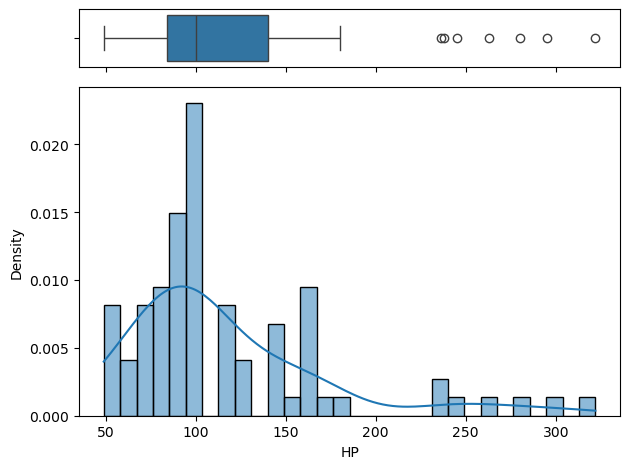

In [6]:
# Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Creating a boxplot
sns.boxplot(data=cars, x='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='')  # Remove x label for the boxplot

# Creating a histogram in the same x-axis
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

# Adjust Layout
plt.tight_layout()
plt.show()



####Observations 
from boxplot and histograms
There are some extreme values (outliers) observed towards the right tail of SP and HP distributions.

In VOL and WT columns, a few outliers are observed in both tails of their distributions.

The extreme values of cars data may have come from the specially designed nature of cars.

As this is multi-dimensional data, the outliers with respect to spatial dimensions may have to be considered while building the regression model.

In [7]:
cars[cars.duplicated()]


,HP,VOL,SP,WT,MPG


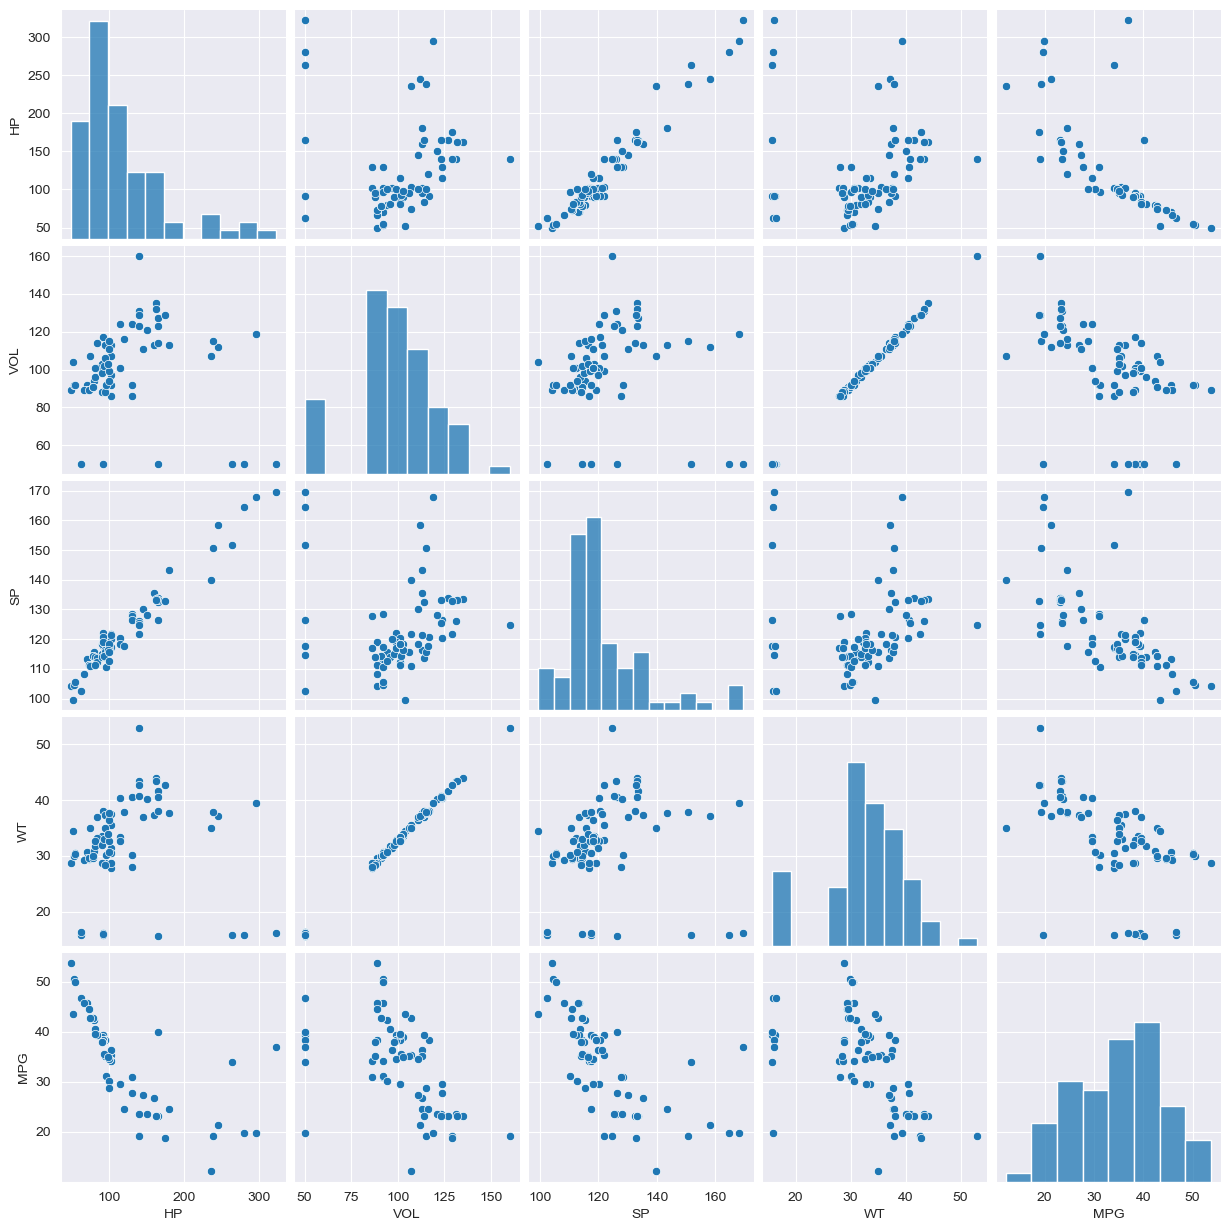

In [8]:
# Pair Plot
sns.set_style(style='darkgrid')
sns.pairplot(cars)


In [9]:
cars.corr(numeric_only=True)

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000



### **Observations from correlation plots and Coefficients**  
- Between x and y, all the x variables are showing moderate to high correlation strengths, highest being between HP and MPG.  
- Therefore, this dataset qualifies for building a multiple linear regression model to predict MPG.  
- Among x columns (x1, x2, x3, and x4), some very high correlation strengths are observed between SP vs HP, VOL vs WT.  
- The high correlation among x columns is not desirable as it might lead to multicollinearity problems.  



In [10]:

model = smf.ols('MPG~WT+VOL+SP+HP', data=cars).fit()



In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        12:03:07   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**** Observations from model summary
- the R-squared and the adjusted r-squared values are good and about 75% of variability in Y is ecplained by Xcolumns
- the probability value with respect to F-static is close to zero,indicating that all or someof X columns are significant
- the p-values for VOL,WT re higher than 5% indicating some interactions issue among themselves,issue among themselves,which need to be further explored


In [13]:
# find the perfomance metrices 
#create a data frame with actual y and predicted y columns
df1 = pd.DataFrame()
df1["actual_y1"] = cars["MPG"]
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [16]:
pred_y1 = model.predict(cars.iloc[:,0:4])
df1["pred_y1"] = pred_y1
df1.head()

,actual_y1,pred_y1
0,53.700681,43.441935
1,50.013401,42.388793
2,50.013401,42.279341
3,45.696322,42.538360
4,50.504232,42.172648


In [19]:
from sklearn.metrics import mean_squared_error


In [21]:
mse = mean_squared_error(df1["actual_y1"], df1["pred_y1"])
print("MSE :",mse)
print("RMSE :",np.sqrt(mse))

MSE : 18.897141152343096
RMSE : 4.347084212704315


In [22]:
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


In [23]:
# Compute VIF values
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) 

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) 

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639
